In [57]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [58]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [59]:
test_dataset = MNIST(root='data/', train=False)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


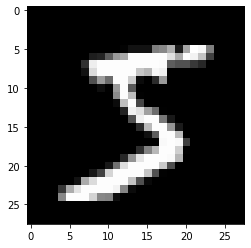

In [61]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [53]:
import torchvision.transforms as transforms
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
img_tensor,label = dataset[0]

torch.Size([1, 28, 28]) 5
tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


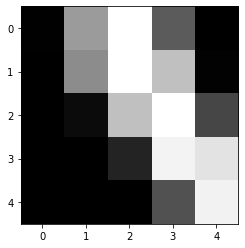

In [54]:
print(img_tensor.shape,label)
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [7]:
# https://www.tutorialsteacher.com/python/magic-methods-in-python
# tensor.__len__() is the same as len(tensor), because len is a magic method
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [159]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [49]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
model.bias

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    images = torch.reshape(images,(128,784))
    outputs = model(images)
    print(outputs)
    break

In [20]:
#We define a model here by ourselves so that we do not need to do the reshape every time
class Mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self,xb):
        xb = xb.reshape(-1,input_size)
        out = self.linear(xb)
        return out
model = Mymodel()  

In [21]:
#Check how our model works
model.linear
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0161,  0.0318, -0.0188,  ...,  0.0308,  0.0330, -0.0266],
         [ 0.0337, -0.0319, -0.0022,  ..., -0.0111,  0.0234, -0.0300],
         [-0.0250, -0.0006, -0.0328,  ...,  0.0160, -0.0144, -0.0066],
         ...,
         [-0.0053,  0.0276, -0.0107,  ...,  0.0067,  0.0133, -0.0337],
         [-0.0062, -0.0224, -0.0250,  ...,  0.0107,  0.0087, -0.0211],
         [-0.0325,  0.0279,  0.0271,  ..., -0.0308, -0.0217, -0.0291]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0283,  0.0068,  0.0161, -0.0074, -0.0185,  0.0116,  0.0147,  0.0011,
          0.0307,  0.0010], requires_grad=True)]

In [166]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
print(outputs)

torch.Size([128, 1, 28, 28])
tensor([[ 1.1288, -3.2538,  1.4205,  ..., -0.8388, -1.1720, -1.6289],
        [-2.2524,  0.7457,  0.0295,  ..., -1.2189,  0.9931,  0.2954],
        [-0.7380, -0.3657,  0.0964,  ..., -2.2763,  0.7354, -0.7760],
        ...,
        [ 0.4936, -2.2101,  0.3707,  ..., -2.2678,  1.1083, -1.7581],
        [ 1.0912,  0.0219, -0.9189,  ..., -1.0488,  1.7987, -1.2825],
        [-1.4395, -0.7756,  2.4351,  ...,  0.3740,  1.9879, -1.6966]],
       grad_fn=<AddmmBackward>)


In [167]:
import torch.nn.functional as F
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)
# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(labels)
print(max_probs)

Sample probabilities:
 tensor([[0.0821, 0.0010, 0.1099, 0.0087, 0.0476, 0.0733, 0.6525, 0.0115, 0.0082,
         0.0052],
        [0.0067, 0.1348, 0.0659, 0.0564, 0.3400, 0.0345, 0.0841, 0.0189, 0.1727,
         0.0859]])
Sum:  1.0
tensor([6, 4, 6, 5, 9, 9, 9, 5, 7, 6, 3, 2, 4, 6, 4, 9, 6, 3, 7, 7, 2, 0, 6, 1,
        6, 6, 6, 7, 6, 2, 0, 6, 7, 6, 7, 6, 9, 0, 8, 8, 9, 1, 4, 1, 5, 6, 3, 0,
        3, 9, 9, 2, 4, 5, 0, 0, 8, 0, 9, 9, 9, 9, 1, 5, 6, 2, 6, 8, 7, 8, 2, 8,
        9, 7, 7, 9, 5, 8, 0, 8, 9, 9, 5, 5, 3, 4, 3, 3, 5, 1, 8, 2, 1, 1, 6, 5,
        4, 1, 5, 2, 6, 7, 8, 4, 3, 3, 6, 1, 7, 0, 7, 0, 2, 1, 9, 2, 5, 8, 6, 2,
        6, 6, 3, 8, 2, 5, 5, 2])
tensor([6, 4, 6, 3, 9, 9, 9, 5, 7, 6, 3, 2, 4, 6, 4, 9, 6, 3, 7, 7, 2, 0, 6, 7,
        6, 6, 6, 7, 6, 2, 0, 2, 7, 6, 7, 6, 7, 0, 8, 8, 9, 1, 4, 1, 7, 6, 3, 0,
        3, 9, 8, 2, 4, 5, 0, 0, 8, 0, 9, 9, 9, 9, 1, 5, 6, 2, 6, 8, 7, 8, 6, 1,
        9, 7, 7, 9, 5, 5, 0, 8, 9, 7, 5, 5, 3, 4, 3, 3, 5, 5, 8, 2, 1, 1, 6, 5,
        9, 1, 5

In [19]:
#This function is used to extend our result to x*10 matrix
def relabels(labels):
    output = torch.zeros(10)
    output[labels[0].item()] = 1
    for label in labels[1:]:
        temp = torch.zeros(10)
        temp[label.item()] = 1
        output = torch.cat((output,temp),0)
    output = torch.reshape(output,(-1,10))
    return(output)
targets = relabels(labels)
print(targets[:2])
print(labels[:2])

NameError: name 'labels' is not defined

In [11]:
#print(torch.sum(preds == labels))
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
#accuracy(outputs, labels)

In [17]:
#Write my loss function
def myloss(preds,targets):
    loss = -torch.sum(torch.mul(torch.log(preds),targets))
    return(loss)
print(torch.mul(torch.log(probs[0]),targets[0]))
loss = myloss(probs[0],targets[0])
print(loss)

NameError: name 'probs' is not defined

In [12]:
import torch.nn.functional as F
#The nn.functional package contains many useful loss functions and several other utilities.

# Define loss function
loss_fn = F.cross_entropy

loss = loss_fn(outputs, labels)
print(loss)

opt = torch.optim.SGD(model.parameters(), lr=1e-3)

NameError: name 'outputs' is not defined

In [13]:
def myfit(num_epochs,train_dl,val_dl,model,loss_fn,opt):
    history = []
    for epoch in range(num_epochs):
        for images,labels in train_dl:
            preds = model(images)
            targets = relabels(labels)
            probs = F.softmax(preds, dim=1)
            loss = loss_fn(probs,targets)
            loss.backward()
            opt.step()
            opt.zero_grad()
            break
        if (epoch+1)%10 == 0:
            result = evaluate(model,val_dl)
            history.append(result)
    return(history)
            
def fit(num_epochs,train_dl,model,loss_fn,opt):
    for epoch in range(num_epochs):
        for images,labels in train_dl:
            preds = model(images)
            loss = loss_fn(preds,labels)
            loss.backward()
            opt.step()
            opt.zero_grad()
            break
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [83]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

def fit_pro(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [98]:
model = MnistModel()
opt = torch.optim.SGD(model.parameters(), lr=1e-3)
result0 = evaluate(model, val_loader)

In [65]:
fit(100, train_loader, model, loss_fn, opt)

Epoch [10/100], Loss: 0.3664
Epoch [20/100], Loss: 0.3715
Epoch [30/100], Loss: 0.6188
Epoch [40/100], Loss: 0.3133
Epoch [50/100], Loss: 0.4165
Epoch [60/100], Loss: 0.5402
Epoch [70/100], Loss: 0.4570
Epoch [80/100], Loss: 0.5253
Epoch [90/100], Loss: 0.5320
Epoch [100/100], Loss: 0.4474


In [99]:
history = myfit(100, train_loader,val_loader, model, myloss, opt)
history

[{'val_loss': 1.43230140209198, 'val_acc': 0.7762064933776855},
 {'val_loss': 1.088355302810669, 'val_acc': 0.800039529800415},
 {'val_loss': 0.9114641547203064, 'val_acc': 0.8071597814559937},
 {'val_loss': 0.7993192672729492, 'val_acc': 0.8342563509941101},
 {'val_loss': 0.7288346886634827, 'val_acc': 0.8440466523170471},
 {'val_loss': 0.6790899634361267, 'val_acc': 0.8508702516555786},
 {'val_loss': 0.6400753259658813, 'val_acc': 0.8491891026496887},
 {'val_loss': 0.6116676330566406, 'val_acc': 0.858781635761261},
 {'val_loss': 0.5883133411407471, 'val_acc': 0.8541337251663208},
 {'val_loss': 0.5660426616668701, 'val_acc': 0.8596716523170471}]

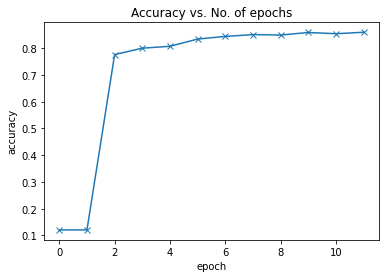

In [168]:
history = [result0]+history
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [54]:
def cross(model,val_dl):
    for images,labels in val_dl:
        outputs= model(images)
        probs = F.softmax(outputs, dim=1)
        prediction(model,images,labels)
        return(accuracy(outputs,labels)) 
def prediction(model,images,labels):
    outputs = model(images)
    probs = F.softmax(outputs, dim=1)
    max_probs, preds = torch.max(probs, dim=1)
    print(preds)
    print(labels)

In [74]:
history1 = fit_pro(1, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.3867, val_acc: 0.7859


1

In [43]:
opt = torch.optim.SGD(model.parameters(), lr=1e-4)
history1 = myfit(100, train_loader,val_loader, model, myloss, opt)
history = history + history1

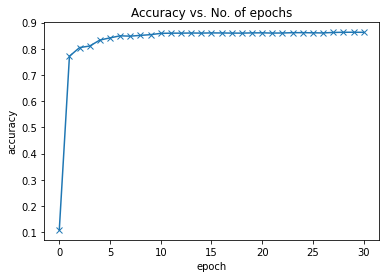

In [44]:
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [101]:
#Next, lets test our model on individual images
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [ ]:
def pre_img(image,model):
    output = model(image)
    _,pred = torch.max(output,dim=1)
    return(pred)

471
Shape: torch.Size([1, 28, 28])
Label: 9
Predict: 9


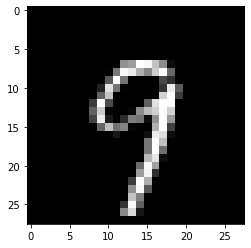

In [157]:
number = torch.randint(0,1000,(1,)).item()
print(number)
img, label = test_dataset[number]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)
print('Predict:',pre_img(img,model).item())

In [161]:
test_dataloader = DataLoader(test_dataset,batch_size = 256)
evaluate(model,test_dataloader)

{'val_loss': 0.5316900014877319, 'val_acc': 0.878710925579071}

In [162]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [164]:
model2 = MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0114,  0.0149, -0.0163,  ..., -0.0069, -0.0306, -0.0297],
                      [ 0.0321, -0.0226, -0.0118,  ...,  0.0213,  0.0197, -0.0100],
                      [ 0.0035,  0.0140,  0.0343,  ..., -0.0221, -0.0159, -0.0088],
                      ...,
                      [ 0.0033, -0.0151,  0.0144,  ..., -0.0302, -0.0075,  0.0066],
                      [-0.0224, -0.0226, -0.0058,  ...,  0.0297, -0.0066, -0.0344],
                      [ 0.0010, -0.0291, -0.0184,  ..., -0.0332, -0.0255,  0.0156]])),
             ('linear.bias',
              tensor([ 0.0299,  0.0052,  0.0350, -0.0278,  0.0249, -0.0113, -0.0219,  0.0281,
                       0.0305, -0.0300]))])

In [165]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))

<All keys matched successfully>

In [ ]:
#Part3: Housing

In [171]:
# Imports
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [169]:
# Hyperparameters
batch_size=64
learning_rate=5e-7


# Other constants
DATASET_URL = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
DATA_FILENAME = "BostonHousing.csv"
TARGET_COLUMN = 'medv'
input_size=13
output_size=1

In [ ]:
# Dataset & Dataloader

In [172]:
# Download the data
download_url(DATASET_URL, '.')
dataframe = pd.read_csv(DATA_FILENAME)
dataframe.head()

100.3%

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [173]:
# Convert from Pandas dataframe to numpy arrays
inputs = dataframe.drop('medv', axis=1).values
targets = dataframe[['medv']].values
inputs.shape, targets.shape

((506, 13), (506, 1))

In [174]:
# Convert to PyTorch dataset
dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32))
train_ds, val_ds = random_split(dataset, [406, 100])

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

In [ ]:
# Model

In [188]:
class HousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        #epoch_loss = sum(batch_losses)/len(batch_losses)
        return {'val_loss':epoch_loss.item()}
        #return {'val_loss':epoch_loss}
        
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
    
model = HousingModel()

In [ ]:
#Training

In [176]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [189]:
result = evaluate(model,val_loader)
result

{'val_loss': 986.7291259765625}

In [190]:
history = fit(10, learning_rate, model, train_loader, val_loader)

Epoch [0], val_loss: 178.5065
Epoch [1], val_loss: 164.0450
Epoch [2], val_loss: 158.0918
Epoch [3], val_loss: 153.7888
Epoch [4], val_loss: 150.8697
Epoch [5], val_loss: 151.4453
Epoch [6], val_loss: 146.5511
Epoch [7], val_loss: 146.0607
Epoch [8], val_loss: 143.9241
Epoch [9], val_loss: 148.1671


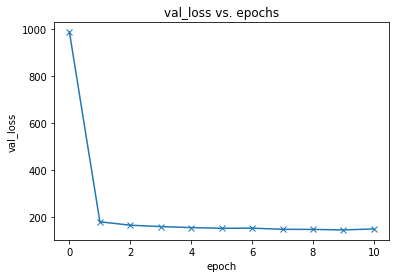

In [191]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

In [ ]:
# Prediction

In [192]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [193]:
x, target = val_ds[10]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([  0.4124,   0.0000,   6.2000,   0.0000,   0.5040,   7.1630,  79.9000,
          3.2157,   8.0000, 307.0000,  17.4000, 372.0800,   6.3600])
Target:  31.600000381469727
Prediction: 16.561443328857422


In [199]:
x.unsqueeze(0) 
# Returns a new tensor with a dimension of size one inserted at the specified position.
#https://pytorch.org/docs/stable/generated/torch.unsqueeze.html

tensor([[  0.4124,   0.0000,   6.2000,   0.0000,   0.5040,   7.1630,  79.9000,
           3.2157,   8.0000, 307.0000,  17.4000, 372.0800,   6.3600]])